In [ ]:
import pandas as pd
from transformers import pipeline

In [ ]:
data = pd.read_csv("gojek_dua.csv")
data.head()

,content,score,at
0,Potongan komisi k drivernya ke gedean Gojek. H...,1,10/28/2024 11:30
1,"Kecewa sama gojek dengan aplikasi baru, tolong...",5,10/28/2024 11:23
2,ok,5,10/28/2024 11:17
3,sdh ok!,5,10/28/2024 11:11
4,Pilihan resto di gorontalo masih terlalu sedik...,3,10/28/2024 11:11


**Memperbaiki typo dataset**

In [ ]:
words_dict = {
    'tdk'  : 'tidak',
    'yg' : 'yang',
    'ga' : 'tidak',
    'gak' : 'tidak',
    'tp' : 'tapi',
    'd' : 'di',
    'sy' : 'saya',
    '&' : 'dan',
    'dgn' : 'dengan',
    'utk' : 'untuk',
    'gk' : 'tidak',
    'jd' : 'jadi',
    'jg' : 'juga',
    'dr' : 'dari',
    'krn' : 'karena',
    'aja' : 'saja',
    'karna' : 'karena',
    'udah' : 'sudah',
    'kmr' : 'kamar',
    'g' : 'tidak',
    'dpt' : 'dapat',
    'banget' : 'sekali',
    'bgt' : 'sekali',
    'kalo' : 'kalau',
    'n' : 'dan',
    'bs' : 'bisa',
    'oke' : 'ok',
    'dg' : 'dengan',
    'pake' : 'pakai',
    'sampe' : 'sampai',
    'dapet' : 'dapat',
    'ad' : 'ada',
    'lg' : 'lagi',
    'bikin' : 'buat',
    'tak' : 'tidak',
    'ny' : 'nya',
    'ngga' : 'tidak',
    'nunggu' : 'tunggu',
    'klo' : 'kalau',
    'blm' : 'belum',
    'trus' : 'terus',
    'kayak' : 'seperti',
    'dlm' : 'dalam',
    'udh' : 'sudah',
    'tau' : 'tahu',
    'org' : 'orang',
    'hrs' : 'harus',
    'msh' : 'masih',
    'sm' : 'sama',
    'byk' : 'banyak',
    'krg' : 'kurang',
    'kmar' : 'kamar',
    'spt' : 'seperti',
    'pdhl' : 'padahal',
    'chek' : 'cek',
    'pesen' : 'pesan',
    'kran' : 'keran',
    'gitu' : 'begitu',
    'tpi' : 'tapi',
    'lbh' : 'lebih',
    'tmpt' : 'tempat',
    'dikasi' : 'dikasih',
    'serem' : 'seram',
    'sya' : 'saya',
    'jgn' : 'jangan',
    'dri' : 'dari',
    'dtg' : 'datang',
    'gada' : 'tidak ada',
    'standart' : 'standar',
    'mlm' : 'malam',
    'k'  : 'ke',
    'kl' : 'kalau',
    'sgt': 'sangat',
    'y' : 'ya',
    'krna' : 'karena',
    'tgl' : 'tanggal',
    'terimakasih' : 'terima kasih',
    'kecoak' : 'kecoa',
    'pd' : 'pada',
    'tdr' : 'tidur',
    'jdi' : 'jadi',
    'kyk' : 'seperti',
    'sdh' : 'sudah',
    'ama' : 'sama',
    'gmana' : 'bagaimana',
    'dalem' : 'dalam',
    'tanyak' : 'tanya',
    'taru' : 'taruh',
    'gede' : 'besar',
    'kaya' : 'seperti',
    'access' : 'akses',
    'tetep' : 'tetap',
    'mgkin' : 'mungkin',
    'sower' : 'shower',
    'idup' : 'hidup',
    'nyaaa' : 'nya',
    'baikk' : 'baik',
    'hanay' : 'hanya',
    'tlp' : 'telpon',
    'kluarga' : 'keluarga',
    'jln' : 'jalan',
    'hr' : 'hari',
    'ngak' : 'tidak',
    'bli' : 'beli',
    'kmar' : 'kamar',
    'naro' : 'taruh',
    'k' : 'ke',
    'ok' : 'oke',
    'Ok' : 'Oke',
    'Gilaaakk' : 'Gila',
    'koyok' : 'kayak',
    'maaanntuuuullll' : 'bagus',
    'Mantappp' : 'mantap'
}

def correct_spelling(text, words_dict):
    # Check if the text is a string before splitting
    if isinstance(text, str):
        words = text.split()  # Pisahkan teks menjadi kata-kata
        corrected_words = [words_dict.get(word, word) for word in words]  # Ganti kata sesuai dengan dictionary
        return ' '.join(corrected_words)  # Gabungkan kembali menjadi kalimat
    else:
        # Handle non-string values (e.g., return original value or a placeholder)
        return text  # or return "" or np.nan, depending on your preference

# Terapkan fungsi perbaikan pada kolom teks di dataset
data['corrected_text'] = data['content'].apply(lambda x: correct_spelling(x, words_dict))
data.head(50)

,content,score,at,corrected_text
0,Potongan komisi k drivernya ke gedean Gojek. H...,1,10/28/2024 11:30,Potongan komisi ke drivernya ke gedean Gojek. ...
1,"Kecewa sama gojek dengan aplikasi baru, tolong...",5,10/28/2024 11:23,"Kecewa sama gojek dengan aplikasi baru, tolong..."
2,ok,5,10/28/2024 11:17,oke
3,sdh ok!,5,10/28/2024 11:11,sudah ok!
4,Pilihan resto di gorontalo masih terlalu sedik...,3,10/28/2024 11:11,Pilihan resto di gorontalo masih terlalu sedik...
5,Gercep,5,10/28/2024 11:10,Gercep
6,"Ongkir gofood gk ngotak, tiba-tiba aja mahal p...",2,10/28/2024 11:05,"Ongkir gofood tidak ngotak, tiba-tiba saja mah..."
7,"Udah ga ngerti lagi, gara"" nunggu driver smpe ...",1,10/28/2024 11:04,"Udah tidak ngerti lagi, gara"" tunggu driver sm..."
8,Oke..,5,10/28/2024 11:02,Oke..
9,Mau bayar gopay later gak bisa. Setelah update,3,10/28/2024 11:01,Mau bayar gopay later tidak bisa. Setelah update


In [ ]:
# Fungsi untuk mengubah rating menjadi label sentimen
def rating_to_sentiment(score):
    if rating >= 4:
        return 'Positif'
    elif rating == 3:
        return 'Netral'
    else:
        return 'Negatif'

# Terapkan fungsi untuk mengubah rating menjadi sentimen
data['sentiment'] = data['score']
# Menampilkan DataFrame dengan kolom sentiment
print(data)

                                                  content  score  \
0       Potongan komisi k drivernya ke gedean Gojek. H...      1   
1       Kecewa sama gojek dengan aplikasi baru, tolong...      5   
2                                                      ok      5   
3                                                 sdh ok!      5   
4       Pilihan resto di gorontalo masih terlalu sedik...      3   
...                                                   ...    ...   
368995                                        ok,membantu      5   
368996                                              Keren      1   
368997                                           The best      5   
368998                                              Lemah      1   
368999  Gojek sekarang aneh bgt. Gk ada opsi pembatala...      3   

                      at                                     corrected_text  \
0       10/28/2024 11:30  Potongan komisi ke drivernya ke gedean Gojek. ...   
1       10/28/2024 11:23 

In [ ]:
data

,content,score,at,corrected_text,sentiment
0,Potongan komisi k drivernya ke gedean Gojek. H...,1,10/28/2024 11:30,Potongan komisi ke drivernya ke gedean Gojek. ...,1
1,"Kecewa sama gojek dengan aplikasi baru, tolong...",5,10/28/2024 11:23,"Kecewa sama gojek dengan aplikasi baru, tolong...",5
2,ok,5,10/28/2024 11:17,oke,5
3,sdh ok!,5,10/28/2024 11:11,sudah ok!,5
4,Pilihan resto di gorontalo masih terlalu sedik...,3,10/28/2024 11:11,Pilihan resto di gorontalo masih terlalu sedik...,3
...,...,...,...,...,...
368995,"ok,membantu",5,10/9/2021 15:26,"ok,membantu",5
368996,Keren,1,10/9/2021 15:26,Keren,1
368997,The best,5,10/9/2021 15:25,The best,5
368998,Lemah,1,10/9/2021 15:25,Lemah,1


In [ ]:
# Melihat distribusi sentimen
sentiment_distribution = data['sentiment'].value_counts()
print(sentiment_distribution)

# Melihat distribusi rating
rating_distribution = data['score'].value_counts()
print(rating_distribution)

sentiment
5    238308
1     78485
4     22518
3     15185
2     14504
Name: count, dtype: int64
score
5    238308
1     78485
4     22518
3     15185
2     14504
Name: count, dtype: int64


<ipython-input-41-3df7005390ee>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='score', palette='Blues')  # 'score' is the actual column name for ratings


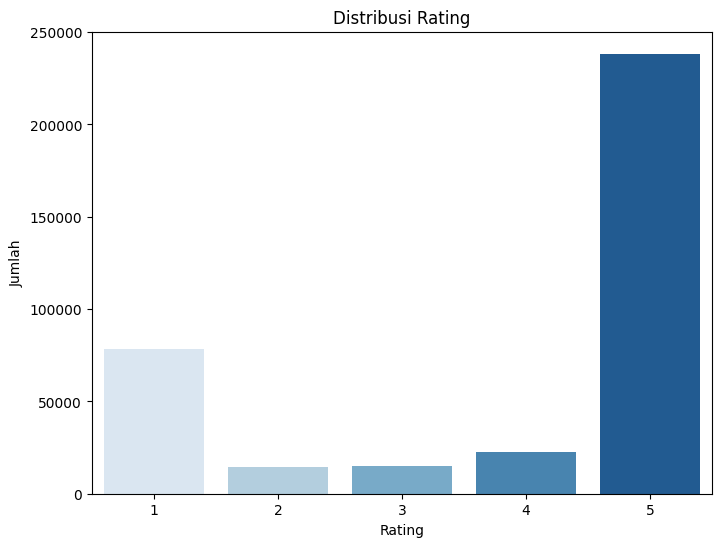

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi rating
plt.figure(figsize=(8, 6))
# Change 'rating' to 'score'
sns.countplot(data=data, x='score', palette='Blues')  # 'score' is the actual column name for ratings
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

**Labeling IndoBERT**

In [ ]:
# Load model IndoBERT untuk analisis sentimen
sentiment_model = pipeline("sentiment-analysis", model="indobenchmark/indobert-base-p1")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]